In [1]:
from sklearn.datasets import load_wine
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
from matplotlib.colors import ListedColormap

In [2]:
# Cargar datos de vino
wine_data = load_wine()
#X = data.data

X = wine_data.data[ :,:2]
print(X)
y = wine_data.target
print(y)

[[14.23  1.71]
 [13.2   1.78]
 [13.16  2.36]
 [14.37  1.95]
 [13.24  2.59]
 [14.2   1.76]
 [14.39  1.87]
 [14.06  2.15]
 [14.83  1.64]
 [13.86  1.35]
 [14.1   2.16]
 [14.12  1.48]
 [13.75  1.73]
 [14.75  1.73]
 [14.38  1.87]
 [13.63  1.81]
 [14.3   1.92]
 [13.83  1.57]
 [14.19  1.59]
 [13.64  3.1 ]
 [14.06  1.63]
 [12.93  3.8 ]
 [13.71  1.86]
 [12.85  1.6 ]
 [13.5   1.81]
 [13.05  2.05]
 [13.39  1.77]
 [13.3   1.72]
 [13.87  1.9 ]
 [14.02  1.68]
 [13.73  1.5 ]
 [13.58  1.66]
 [13.68  1.83]
 [13.76  1.53]
 [13.51  1.8 ]
 [13.48  1.81]
 [13.28  1.64]
 [13.05  1.65]
 [13.07  1.5 ]
 [14.22  3.99]
 [13.56  1.71]
 [13.41  3.84]
 [13.88  1.89]
 [13.24  3.98]
 [13.05  1.77]
 [14.21  4.04]
 [14.38  3.59]
 [13.9   1.68]
 [14.1   2.02]
 [13.94  1.73]
 [13.05  1.73]
 [13.83  1.65]
 [13.82  1.75]
 [13.77  1.9 ]
 [13.74  1.67]
 [13.56  1.73]
 [14.22  1.7 ]
 [13.29  1.97]
 [13.72  1.43]
 [12.37  0.94]
 [12.33  1.1 ]
 [12.64  1.36]
 [13.67  1.25]
 [12.37  1.13]
 [12.17  1.45]
 [12.37  1.21]
 [13.11  1

In [3]:
# Dataset 1: Datos originales
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

# Dataset 2: Datos escalados y normalizados
scaler = StandardScaler()  # Escalado estándar
# scaler = MinMaxScaler()  # Normalización Min-Max
X_scaled = scaler.fit_transform(X)
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=24)


In [4]:
#X_entrenamiento, X_test, y_entrenamiento, y_test=train_test_split(X, y)
arbol = DecisionTreeClassifier(max_depth=3)
arbol.fit(X_train, y_train)
accurancy_dt = arbol.score(X_test, y_test)

arbol_scaled=DecisionTreeClassifier(max_depth=3)
arbol_scaled.fit(X_train_scaled, y_train)
accurancy_dt_scaled = arbol_scaled.score(X_test_scaled, y_test)

print(f"Decision Tree accuracy: {accurancy_dt:.3f}")
print(f"Scaled Decision Tree accuracy: {accurancy_dt_scaled:.3f}")

Decision Tree accuracy: 0.833
Scaled Decision Tree accuracy: 0.833


In [5]:
export_graphviz(arbol, out_file='arbol1.dot', class_names=wine_data.target_names, feature_names=wine_data.feature_names[:2], impurity=False, filled=True)

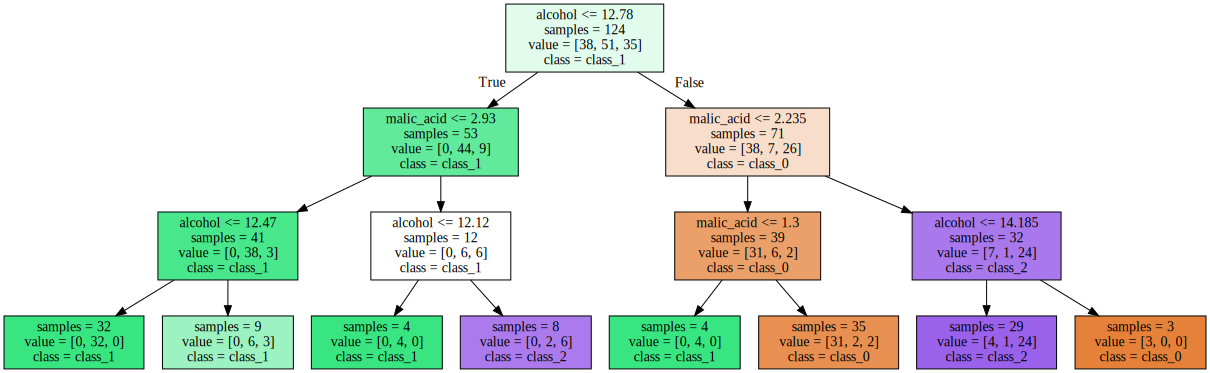

In [6]:
with open('arbol1.dot') as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

[Text(167.4, 190.26, 'X[0] <= 12.78\ngini = 0.657\nsamples = 124\nvalue = [38, 51, 35]'),
 Text(83.7, 135.9, 'X[1] <= 2.93\ngini = 0.282\nsamples = 53\nvalue = [0, 44, 9]'),
 Text(41.85, 81.53999999999999, 'X[0] <= 12.47\ngini = 0.136\nsamples = 41\nvalue = [0, 38, 3]'),
 Text(20.925, 27.180000000000007, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.444\nsamples = 9\nvalue = [0, 6, 3]'),
 Text(125.55000000000001, 81.53999999999999, 'X[0] <= 12.12\ngini = 0.5\nsamples = 12\nvalue = [0, 6, 6]'),
 Text(104.625, 27.180000000000007, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0]'),
 Text(146.475, 27.180000000000007, 'gini = 0.375\nsamples = 8\nvalue = [0, 2, 6]'),
 Text(251.10000000000002, 135.9, 'X[1] <= 2.235\ngini = 0.57\nsamples = 71\nvalue = [38, 7, 26]'),
 Text(209.25, 81.53999999999999, 'X[1] <= 1.3\ngini = 0.342\nsamples = 39\nvalue = [31, 6, 2]'),
 Text(188.32500000000002, 27.180000000000007, 'gini = 0.0\nsamples = 4\nvalue = 

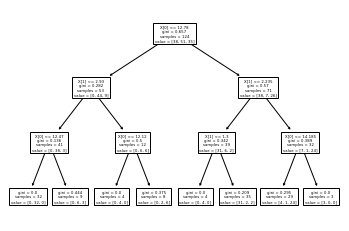

In [7]:
from sklearn.tree import plot_tree
plot_tree(arbol)